# Building Model
---
Data yang digunakan adalah data yang sebelumnya telah melalui tahapan preprocessing dan cleaning. Modifikasi dilakukan di notebook terpisah -> **EDA_HeartDisease.ipynb**


Modifikasi data:
- Input missing value dengan nilai median kolom
- Merubah target dari multiclass menjadi binary class
- Mengatasi outlier dengan teknik winsorize

# Import Library
-----

In [1]:
# Import library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn') # Use seaborn style

# Input Dataset

-----

In [3]:
# Input dataset
# input -> Dataframe

df = pd.read_csv('data_binary.csv') # Initialization dataset

# General Overview
Melihat data secara umum | disini saya pakai fungsi ***head()*** ,***tail()*** ,***info()***, ***describe()***

-----

In [4]:
df.head() # 5 first row

,trestbps,chol,thalach,oldpeak,age,sex,cp,fbs,restecg,exang,slope,thal,ca,num_binary
0,145.0,233.0,150.0,2.3,63.0,1.0,1.0,1.0,2.0,0.0,3.0,6.0,0.0,0
1,160.0,286.0,108.0,1.5,67.0,1.0,4.0,0.0,2.0,1.0,2.0,3.0,3.0,1
2,120.0,229.0,129.0,2.6,67.0,1.0,4.0,0.0,2.0,1.0,2.0,7.0,2.0,1
3,130.0,250.0,187.0,3.5,37.0,1.0,3.0,0.0,0.0,0.0,3.0,3.0,0.0,0
4,130.0,204.0,172.0,1.4,41.0,0.0,2.0,0.0,2.0,0.0,1.0,3.0,0.0,0


In [5]:
df.tail() # 5 last row

,trestbps,chol,thalach,oldpeak,age,sex,cp,fbs,restecg,exang,slope,thal,ca,num_binary
298,110.0,264.0,132.0,1.2,45.0,1.0,1.0,0.0,0.0,0.0,2.0,7.0,0.0,1
299,144.0,193.0,141.0,3.4,68.0,1.0,4.0,1.0,0.0,0.0,2.0,7.0,2.0,1
300,130.0,131.0,115.0,1.2,57.0,1.0,4.0,0.0,0.0,1.0,2.0,7.0,1.0,1
301,130.0,236.0,174.0,0.0,57.0,0.0,2.0,0.0,2.0,0.0,2.0,3.0,1.0,1
302,138.0,175.0,173.0,0.0,38.0,1.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,0


In [6]:
df.describe() # Descriptif statistic

,trestbps,chol,thalach,oldpeak,age,sex,cp,fbs,restecg,exang,slope,thal,ca,num_binary
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,130.455446,244.000000,149.813531,0.984818,54.438944,0.679868,3.158416,0.148515,0.990099,0.326733,1.600660,4.722772,0.663366,0.458746
std,15.299997,44.869052,22.441514,1.043888,9.038662,0.467299,0.960126,0.356198,0.994971,0.469794,0.616226,1.938383,0.934375,0.499120
min,94.000000,126.000000,88.000000,0.000000,29.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000
25%,120.000000,211.000000,133.750000,0.000000,48.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000
50%,130.000000,241.000000,153.000000,0.800000,56.000000,1.000000,3.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000
75%,140.000000,275.000000,166.000000,1.600000,61.000000,1.000000,4.000000,0.000000,2.000000,1.000000,2.000000,7.000000,1.000000,1.000000
max,170.000000,360.000000,202.000000,4.000000,77.000000,1.000000,4.000000,1.000000,2.000000,1.000000,3.000000,7.000000,3.000000,1.000000


# Prepare data
-----

### -- Spitting features and label

In [8]:
features = df.drop(columns=['num_binary'])
label = df['num_binary']

In [9]:
print(features.shape)
print(label.shape)

(303, 13)
(303,)


### -- Feature Enginering

In [10]:
# Change data type 

columns_cat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']

features[columns_cat] = features[columns_cat].astype('category')

In [11]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   trestbps  303 non-null    float64 
 1   chol      303 non-null    float64 
 2   thalach   303 non-null    float64 
 3   oldpeak   303 non-null    float64 
 4   age       303 non-null    int64   
 5   sex       303 non-null    category
 6   cp        303 non-null    category
 7   fbs       303 non-null    category
 8   restecg   303 non-null    category
 9   exang     303 non-null    category
 10  slope     303 non-null    category
 11  thal      303 non-null    category
 12  ca        303 non-null    category
dtypes: category(8), float64(4), int64(1)
memory usage: 15.5 KB


In [12]:
# Normalize numeric data

features_num = features.select_dtypes(exclude='category')
features_num

,trestbps,chol,thalach,oldpeak,age
0,145.0,233.0,150.0,2.3,63
1,160.0,286.0,108.0,1.5,67
2,120.0,229.0,129.0,2.6,67
3,130.0,250.0,187.0,3.5,37
4,130.0,204.0,172.0,1.4,41
...,...,...,...,...,...
298,110.0,264.0,132.0,1.2,45
299,144.0,193.0,141.0,3.4,68
300,130.0,131.0,115.0,1.2,57
301,130.0,236.0,174.0,0.0,57


In [13]:
features_num_tf = pd.DataFrame()

# apply normalization techniques
for column in features_num.columns:
    features_num_tf[column] = features_num[column]  / features_num[column].abs().max()

In [14]:
features_num_tf

,trestbps,chol,thalach,oldpeak,age
0,0.852941,0.647222,0.742574,0.575,0.818182
1,0.941176,0.794444,0.534653,0.375,0.870130
2,0.705882,0.636111,0.638614,0.650,0.870130
3,0.764706,0.694444,0.925743,0.875,0.480519
4,0.764706,0.566667,0.851485,0.350,0.532468
...,...,...,...,...,...
298,0.647059,0.733333,0.653465,0.300,0.584416
299,0.847059,0.536111,0.698020,0.850,0.883117
300,0.764706,0.363889,0.569307,0.300,0.740260
301,0.764706,0.655556,0.861386,0.000,0.740260


In [15]:
# OHE for categorical dataset
features_cat = features.select_dtypes(include='category')
features_cat

,sex,cp,fbs,restecg,exang,slope,thal,ca
0,1.0,1.0,1.0,2.0,0.0,3.0,6.0,0.0
1,1.0,4.0,0.0,2.0,1.0,2.0,3.0,3.0
2,1.0,4.0,0.0,2.0,1.0,2.0,7.0,2.0
3,1.0,3.0,0.0,0.0,0.0,3.0,3.0,0.0
4,0.0,2.0,0.0,2.0,0.0,1.0,3.0,0.0
...,...,...,...,...,...,...,...,...
298,1.0,1.0,0.0,0.0,0.0,2.0,7.0,0.0
299,1.0,4.0,1.0,0.0,0.0,2.0,7.0,2.0
300,1.0,4.0,0.0,0.0,1.0,2.0,7.0,1.0
301,0.0,2.0,0.0,2.0,0.0,2.0,3.0,1.0


In [16]:
# Apply ohe

features_cat_ohe = pd.get_dummies(features_cat[['ca', 'cp', 'slope', 'thal','restecg']])
features_cat_ohe

,ca_0.0,ca_1.0,ca_2.0,ca_3.0,cp_1.0,cp_2.0,cp_3.0,cp_4.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0,restecg_0.0,restecg_1.0,restecg_2.0
0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1
2,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1
3,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0
4,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0
299,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0
300,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0
301,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1


In [17]:
features_bin = features_cat.drop(columns=['ca', 'cp', 'slope', 'thal', 'restecg']).astype(int)
features_bin

,sex,fbs,exang
0,1,1,0
1,1,0,1
2,1,0,1
3,1,0,0
4,0,0,0
...,...,...,...
298,1,0,0
299,1,1,0
300,1,0,1
301,0,0,0


In [18]:
# Combine all columns

features_new = pd.concat([features_num_tf, features_cat_ohe, features_bin], axis=1)
features_new

,trestbps,chol,thalach,oldpeak,age,ca_0.0,ca_1.0,ca_2.0,ca_3.0,cp_1.0,...,slope_3.0,thal_3.0,thal_6.0,thal_7.0,restecg_0.0,restecg_1.0,restecg_2.0,sex,fbs,exang
0,0.852941,0.647222,0.742574,0.575,0.818182,1,0,0,0,1,...,1,0,1,0,0,0,1,1,1,0
1,0.941176,0.794444,0.534653,0.375,0.870130,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,1
2,0.705882,0.636111,0.638614,0.650,0.870130,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,1
3,0.764706,0.694444,0.925743,0.875,0.480519,1,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
4,0.764706,0.566667,0.851485,0.350,0.532468,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.647059,0.733333,0.653465,0.300,0.584416,1,0,0,0,1,...,0,0,0,1,1,0,0,1,0,0
299,0.847059,0.536111,0.698020,0.850,0.883117,0,0,1,0,0,...,0,0,0,1,1,0,0,1,1,0
300,0.764706,0.363889,0.569307,0.300,0.740260,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,1
301,0.764706,0.655556,0.861386,0.000,0.740260,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [19]:
features_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   trestbps     303 non-null    float64
 1   chol         303 non-null    float64
 2   thalach      303 non-null    float64
 3   oldpeak      303 non-null    float64
 4   age          303 non-null    float64
 5   ca_0.0       303 non-null    uint8  
 6   ca_1.0       303 non-null    uint8  
 7   ca_2.0       303 non-null    uint8  
 8   ca_3.0       303 non-null    uint8  
 9   cp_1.0       303 non-null    uint8  
 10  cp_2.0       303 non-null    uint8  
 11  cp_3.0       303 non-null    uint8  
 12  cp_4.0       303 non-null    uint8  
 13  slope_1.0    303 non-null    uint8  
 14  slope_2.0    303 non-null    uint8  
 15  slope_3.0    303 non-null    uint8  
 16  thal_3.0     303 non-null    uint8  
 17  thal_6.0     303 non-null    uint8  
 18  thal_7.0     303 non-null    uint8  
 19  restecg_

### -- Splitting into training and testing

References for default random_state is 42 : https://en.wikipedia.org/wiki/Phrases_from_The_Hitchhiker%27s_Guide_to_the_Galaxy

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=  train_test_split(features_new, label, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(242, 25)
(242,)
(61, 25)
(61,)


### -- Feature selection (optional)

C:\Users\Dell\anaconda3\envs\IndonesiaAi\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:13:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Mean ROC AUC: 0.87692


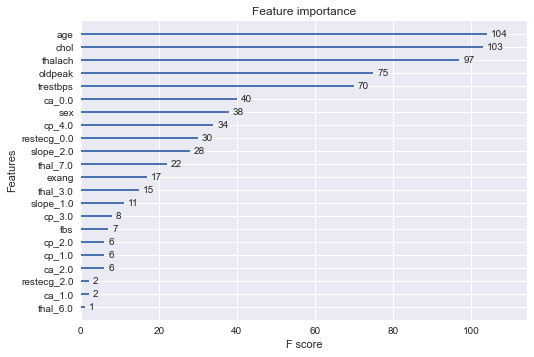

In [21]:
# using xboost feature selectin

from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

# Scoring accuracy xgbosst
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# fit model to training data
xgb_model = XGBClassifier(random_state = 0 )
xgb_model.fit(X_train, y_train)

# evaluate model
scores = cross_val_score(xgb_model, features_new, label, scoring='roc_auc', cv=cv, n_jobs=-1)

feature_importances = xgb_model.feature_importances_

print('Mean ROC AUC: %.5f' % mean(scores))

# plot feature importance
plot_importance(xgb_model)
plt.show()

# Hyperparameter Experiment
----

### -- Base Model (Binary classification)

reference base model from https://medium.com/@am7799/machine-learning-on-heart-disease-dataset-8a930cefff1d

In [22]:
from keras.layers import Dense
from keras.models import Sequential
import time
from keras.optimizers import SGD


def fit_model(X_train, y_train, X_test, y_test, n_batch=200, 
              opt='adam', lr=None, epoch=200, class_weight=None,mode='batch'):
    
#     define model
    model = Sequential(name='Base_model')
    
    model.add(Dense(12, activation='relu',input_dim=25, kernel_initializer='uniform'))
    model.add(Dense(12, activation='relu', kernel_initializer='uniform'))
    model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))
    
#     compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
#     model fit
    time_start = time.perf_counter() # Monitoring running code
    
    if class_weight is None:
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                            epochs=epoch, verbose=0, batch_size=n_batch)
    else:
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                            epochs=epoch, verbose=0, batch_size=n_batch, class_weight=class_weight)
        
    time_end = time.perf_counter() # Monitoring running code
    
    score = model.evaluate(X_test, y_test, batch_size=n_batch, verbose=0) # Monitoring running code
    training_time = time_end - time_start
    
#     string
    batch = f'Batch={n_batch} | '
    score = f'Score={score[1]:.2f} | '
    duration = f'Time={training_time:.2f} | '
    optimizers = f'Optimizer={opt} | '
    learning_rate = f'Learning Rate={lr} | '
    
#     title
    if mode == 'batch':
        title = batch + score + duration
    elif mode == 'optimizer':
        title = batch + score + optimizers
    elif mode == 'lr':
        title = batch + score + learning_rate
    
#     plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title(title)
    plt.legend()

### -- Experiment with batch_size

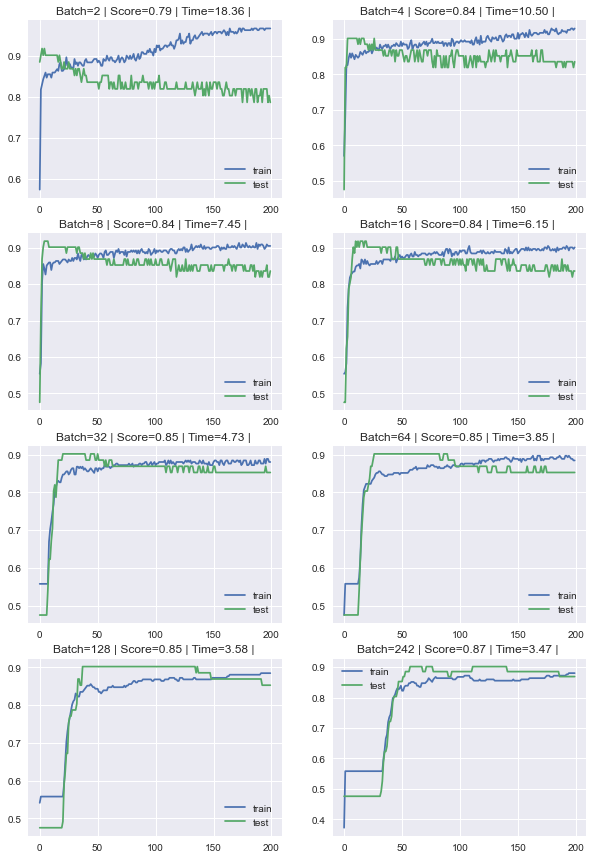

In [34]:
stocastic = len(X_train)
n_batch = [2,4,8,16,32,64,128, stocastic]

plt.figure(figsize=(10, 15))
for i in range(len(n_batch)):
    
#     plotting
    plt_no = 420 + (i+1)
    plt.subplot(plt_no)
    
#     train model
    fit_model(X_train, y_train, X_test, y_test, n_batch[i], mode='batch')

#     show plot
plt.show()

##### Eksperimen dengan Batch Size

1. General overview:
    - Rata-rata akurasi semua batch dengan optimizer adam berkisar disekitar 85. Namun dari seluruh batch menunjukan karakteristik training yang berbeda
    - Secara keseluruhan, pada grafik tidak ditemukan akan adanya peningkatan yang signifikan terhadap akurasi model kecuali bada batch 2 dan 4. Akan tetapi pada batch 2 terindikasi overvitting parah. 
    - Secara umum, pada epoch kurang dari 50 terlihat bahwa akurasi pada testing mencapai hingga 90%  


2. Tingkat overvitting:
    - Pada batch dengan angka rendah (disekitar batch 2-32) menunjukan gejala model underfitting di bawah 50 epoch dan berakhir pada sekitar epoch ke 50. akan tetapi mulai pada epoch 50 keatas data menunjukan gejala overvitting. data dengan overvitting yang paling signifikan terjadi bada batch 2
    - Sedangkan pada batch 32 keatas terlihat bahwa akurasi model pada data training terus dibawah akurasi model testing (underfitting)


3. Learning speed:
    - Learning speed tertinggi berada pada batch dengan angka rendah. Semakin tinggi batchnya semakin tinggi tingkat learning speednya.


4. Training speed:
    - Semakin tinggi angka pada batch maka semakin cepat trainingnya


5. Tingkat Fluktuatif:
   - Semakin kecil batchnya terlihat tingkat fluktuatifnya tinggi, begitupun sebaliknya


6. Maka pada proses selanjutnya akan dicoba eksperimen pada epoch:
    - Mengurangi jumlah epoch pada batch 8 - 64
    - Meningkatkan jumlah epoch untuk keseluruhan

### -- Experiment with epoch

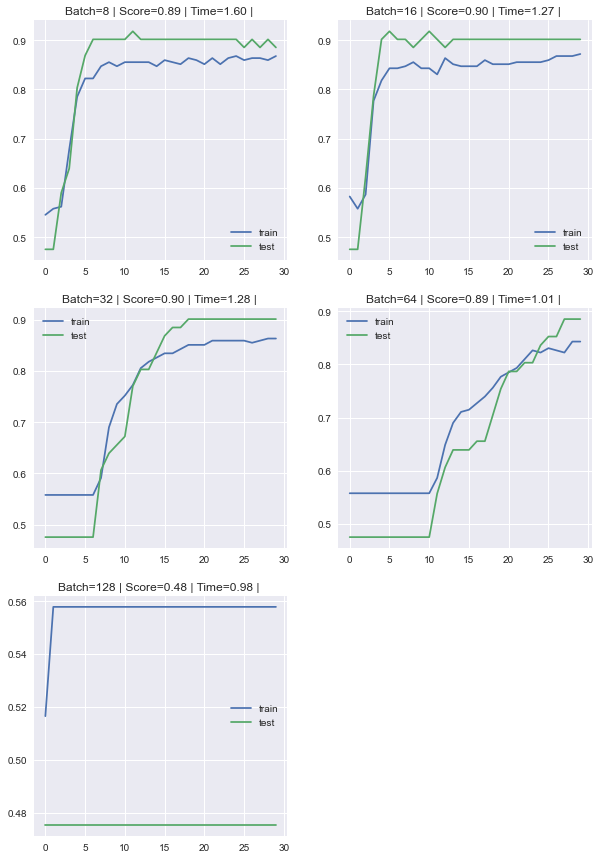

In [44]:
# mengurangi epoch

n_batch2 = [8,16,32,64,128]

plt.figure(figsize=(10, 15))
for i in range(len(n_batch2)):
    
#     plotting
    plt_no = 320 + (i+1)
    plt.subplot(plt_no)
    
#     train model
    fit_model(X_train, y_train, X_test, y_test, n_batch[i], mode='batch', epoch=30)

#     show plot
plt.show()

Setelah epoch dikurangi terlihat bahwa model mengalami peningkatan akurasi, kecuali batch 128. Akan tetapi Ini juga bisa menjadi bias karena training secara keseluruhan mengalami underfitting

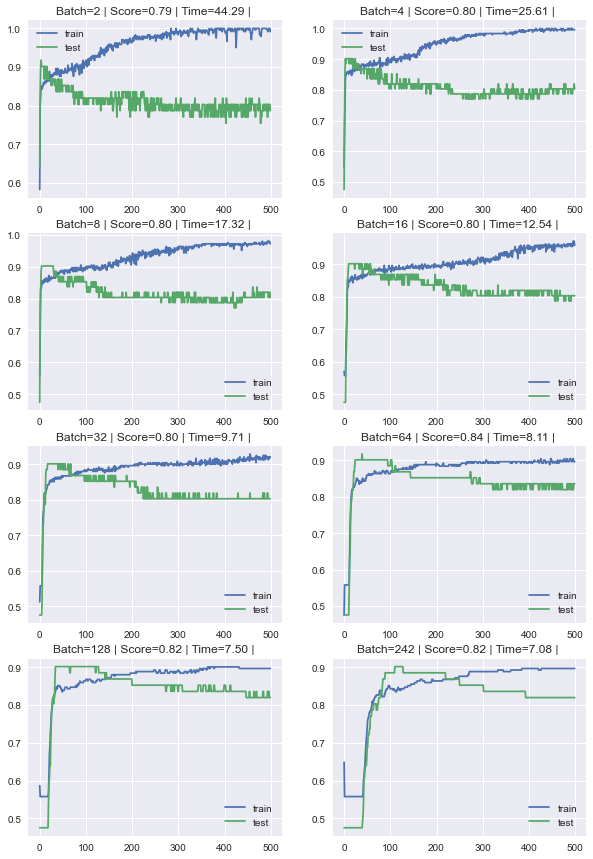

In [45]:
# Penambahan epoch

stocastic = len(X_train)
n_batch = [2,4,8,16,32,64,128, stocastic]

plt.figure(figsize=(10, 15))
for i in range(len(n_batch)):
    
#     plotting
    plt_no = 420 + (i+1)
    plt.subplot(plt_no)
    
#     train model
    fit_model(X_train, y_train, X_test, y_test, n_batch[i], mode='batch', epoch=500)

#     show plot
plt.show()

Setelah mengalami training 500 epoch, model mengalami overvitting pada keseluruhan batch. Maka pada eksperimen selanjutnya menggunakan tidak menggunakan parameter epoch yang tinggi.<br>
Akurasi model terlihat konvergen pada nilai 80% pada data testing.

#### Eksperimen dengan Epoch

**Summary** : Dari 2 eksperimen yang telah dilakukan, terlihat bahwa semakin tinggi epochnya kecenderungan model untuk overfitting akan semakin tinggi

Maka pada proses selanjutnya akan dicoba eksperimen:
- Dengan 50 epoch (Menghindari epoch yang berlebihan)
- Dengan 4 parameter batch (4,8,16,128) -> dipilih karena memiliki performa yang lumayan baik

### -- Experiment with optimizer

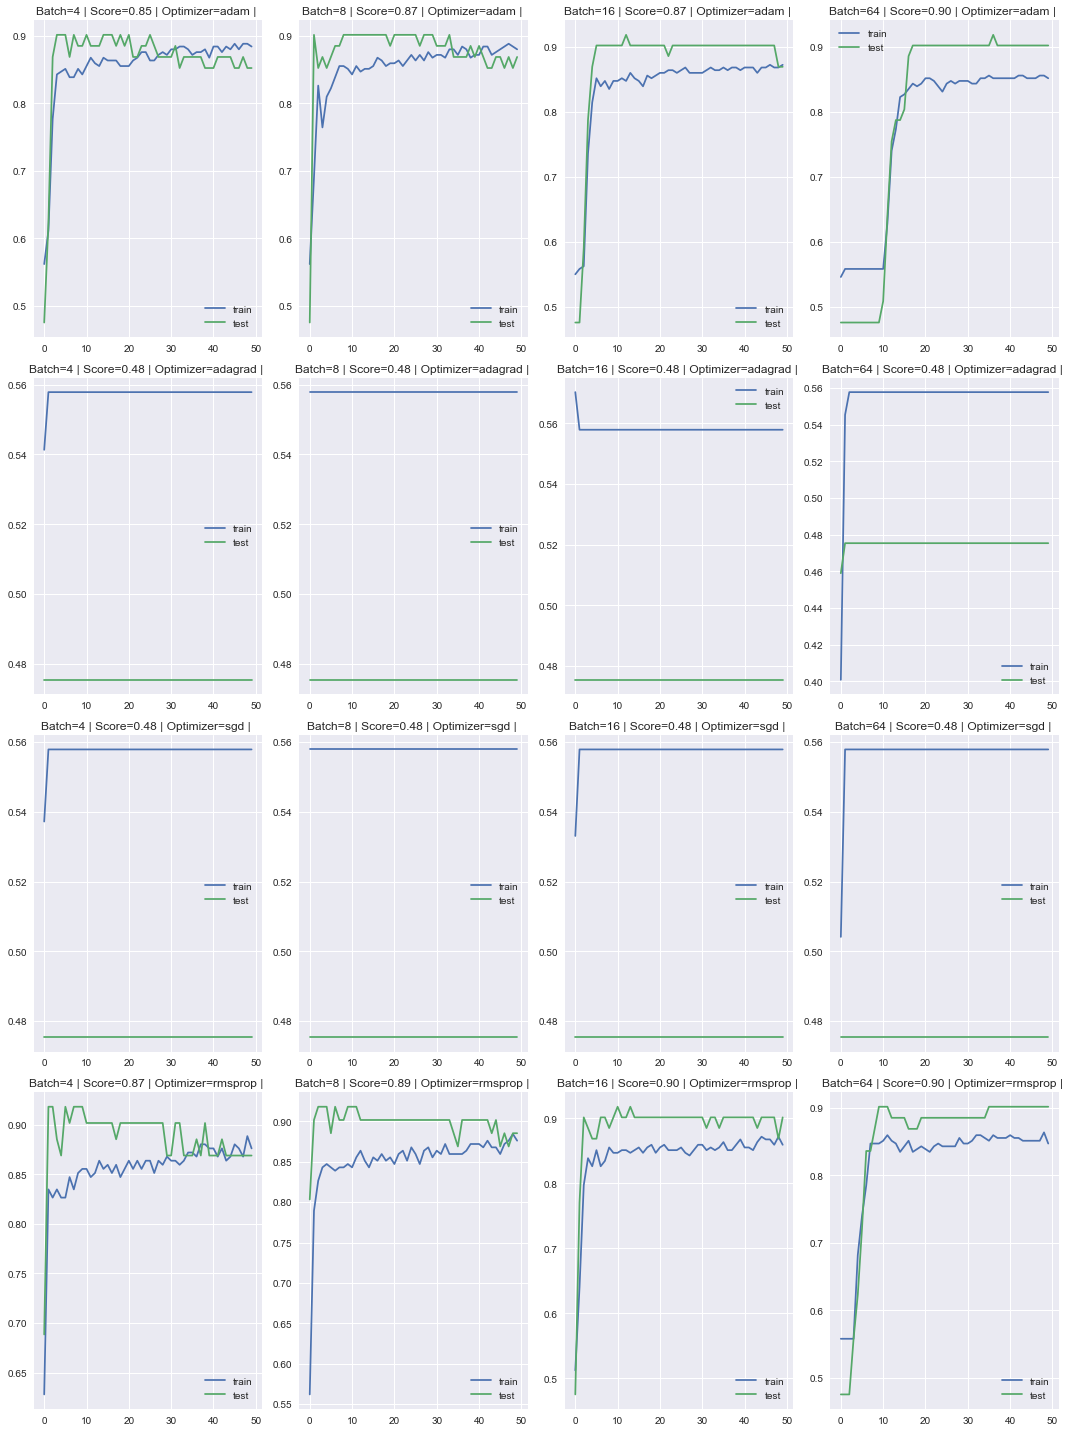

In [48]:
n_batch = [4,8, 16, 128]
optimizer = ['adam', 'adagrad', 'sgd', 'rmsprop']

plt.figure(figsize=(15, 20))

k=0
for i in range(len(optimizer)):
 
    for j in range(len(n_batch)):
                   
        k+=1
    
#     plotting
        plt.subplot(4, 4, k)
        plt.tight_layout()
    
#     train model
        fit_model(X_train, y_train, X_test, y_test, n_batch[j], epoch=50,
                 opt=optimizer[i], mode='optimizer')
        
#     show plot
plt.show()

#### Eksperimen pada Optimizer

Learning:
- Pada model dengan optimizer adam dan rmsprop menunjukan akurasi yang baik pada 100 epoch. Dan menunjukan DNN dapat belajar ditunjukan dengan meningkatnya akurasi dari data training. Akan tetapi pada akurasi data testing menunjukan konvergen pada rata-rata akurasi 90%
- Pada model dengan optimizer sgd dan adagrad tidak menunjukan peningkatan akurasi. Artinya model dengan optimizer adagrad dan sgd tidak efektif dalam melakukan pembelajaran

### -- Experiment with SGDs learning rate

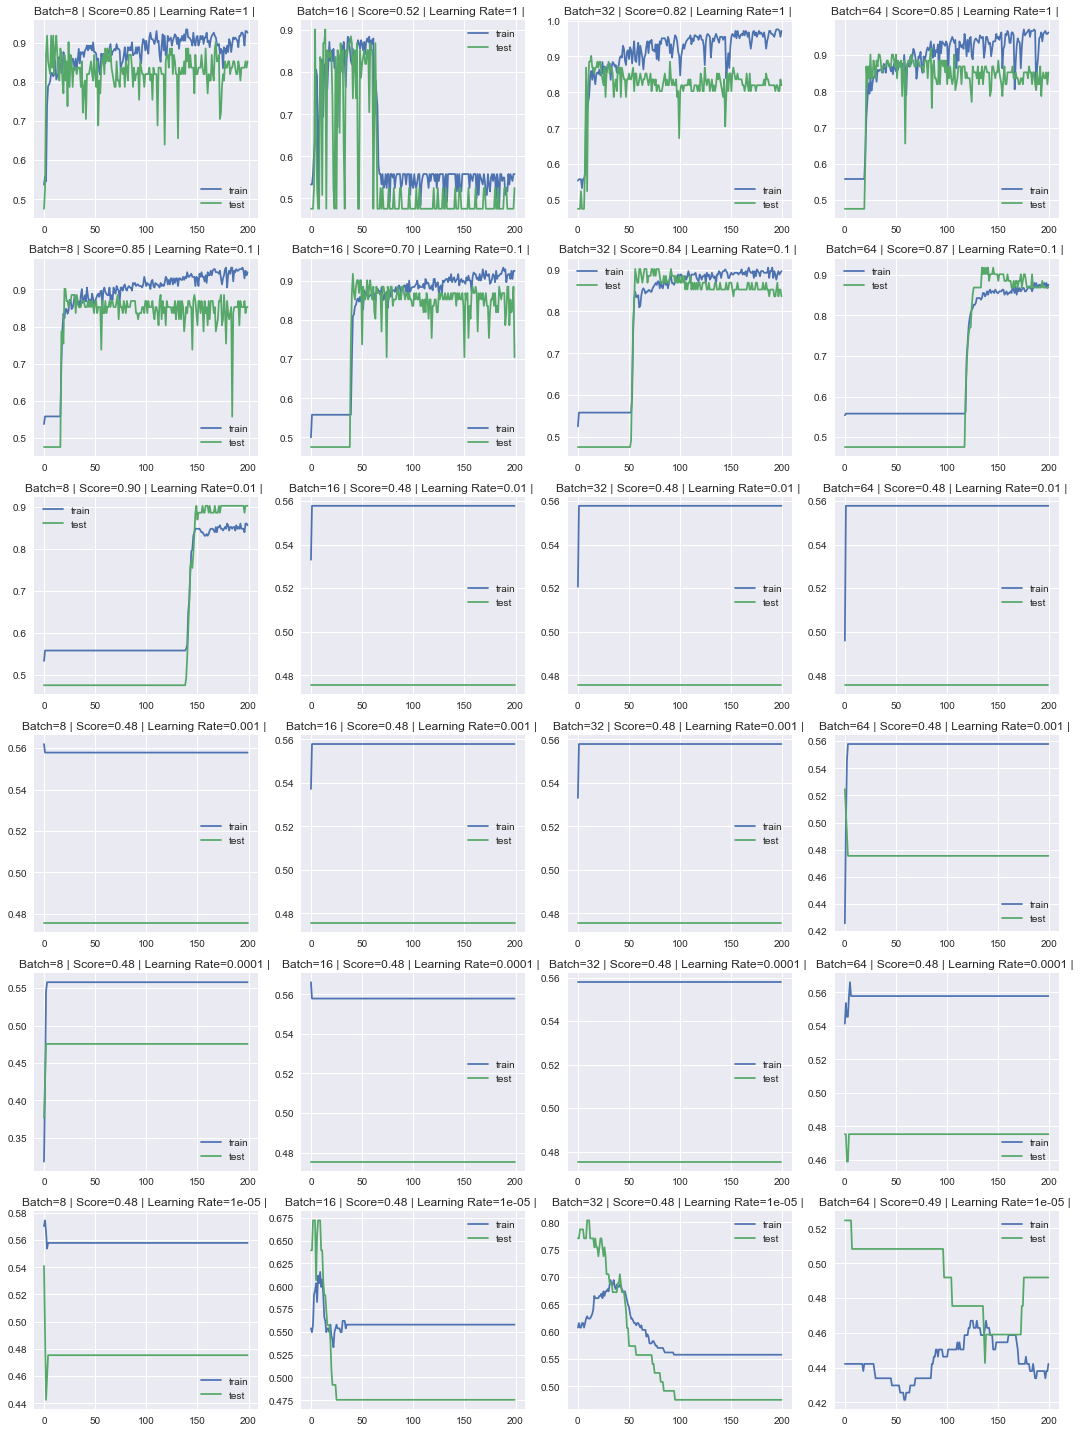

In [23]:
n_batch = [8,16,32,64]
learning_rate = [1, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5] # Use global learning rate method

plt.figure(figsize=(15, 20))

k=0
for i in range(len(learning_rate)):
 
    for j in range(len(n_batch)):
                   
        k+=1
    
#     plotting
        plt.subplot(6, 4, k)
        plt.tight_layout()
    
#     train model
        fit_model(X_train, y_train, X_test, y_test, n_batch[j], epoch=200,
                 opt=SGD(lr=learning_rate[i]), mode='lr', lr=learning_rate[i])
        
#     show plot
plt.show()

#### Eksperimen dengan learning rate SGD

1. General overview:
    - Secara umum dapat dilihat bahwa model cenderung tidak mempelajari data dengan baik (kecuali pada learning 0.1, dan 1)
    - Learning curve terlihat lebih fluktuatif


2. Pada learning rate 1:
    - Terlihat bahwa akurasi model tidak stabil. (Sangat fluktuatif)
    - Model cenderung over fitting 
    - Pada batch 64 akurasi model turun hingga rata-rata 50%


3. Pada learning rate 0.1:
    - Gejala overfitting cenderung lebih berkurang daripada learning rate sebelumnya.
    - Dari grafik terlihat semakin kecil parameter batch yang digunakan maka learning speednya pun akan meningkat
    - Pada batch dengan nilai parameter rendah model akurasi cenderung lebih tidak stabil daripada model dengan parameter batch tinggi

# Summary
1. Umum :
    - Secara umum, pada keseluruhan eksperimen model akan cenderung overfitting jika dilakukan training(epoch) yang berlebihan
    - Training speed dipengaruhi oleh nilai parameter batch. Semakin besar nilainya maka training speednya juga akan bertambah
    - Proses training SGD dipengaruhi oleh learning rate. Pada learning rate rendah, model cenderung untuk lebih cepat untuk belajar tetapi cenderung lebih fluktuatif pada data ini dan sebaliknya


2. model:
    - Akurasi model tertinggi yang berhasil didapat selama eksperimen adalah sebesar 90% menggunakan optimizer adam dan rmsprop dengan nilai parameter epoch diantara 25 - 50 pada batch 16 dan 64
    - Optimizer adagrad sangat tidak direkomendasikan untuk data ini
    - Optimizer SDG mungkin masih bisa dipertimbangkan dengan beberapa tunning parameter pada learning rate
    - epoch yang direkomendasikan sekitar 50 - 200 epoch
    - batch yang direkomendasikan adalah batch size 64

# Prediction 
---

In [25]:
# adam, batch 64, epoch

model = Sequential(name='Base_model')
    
model.add(Dense(12, activation='relu',input_dim=25, kernel_initializer='uniform'))
model.add(Dense(12, activation='relu', kernel_initializer='uniform'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))

In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50, verbose=1, batch_size=64)

Epoch 1/50
4/4 [==============================] - 0s 35ms/step - loss: 0.6930 - accuracy: 0.5579 - val_loss: 0.6932 - val_accuracy: 0.4754
Epoch 2/50
4/4 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.5579 - val_loss: 0.6931 - val_accuracy: 0.4754
Epoch 3/50
4/4 [==============================] - 0s 10ms/step - loss: 0.6923 - accuracy: 0.5579 - val_loss: 0.6929 - val_accuracy: 0.4754
Epoch 4/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.5579 - val_loss: 0.6927 - val_accuracy: 0.4754
Epoch 5/50
4/4 [==============================] - 0s 6ms/step - loss: 0.6912 - accuracy: 0.5579 - val_loss: 0.6923 - val_accuracy: 0.4754
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.5579 - val_loss: 0.6916 - val_accuracy: 0.4754
Epoch 7/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6892 - accuracy: 0.5579 - val_loss: 0.6906 - val_accuracy: 0.4754
Epoch 8/50
4/4 [================

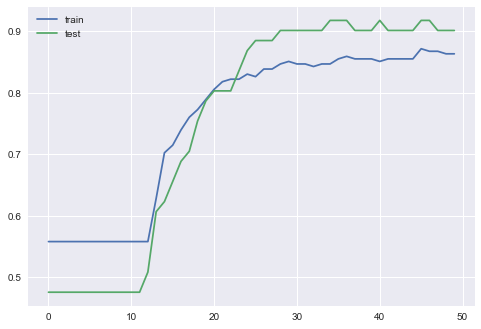

In [30]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

In [51]:
y_pred = model.predict(X_test)

In [48]:
y_pred_new = np.where(y_pred < 0.5, 0, 1)

In [54]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, y_pred_new)

array([[27,  2],
       [ 4, 28]], dtype=int64)

In [57]:
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



---

In [65]:
# rmsprop, batch 64, epoch

model1 = Sequential(name='Base_model_2')
    
model1.add(Dense(12, activation='relu',input_dim=25, kernel_initializer='uniform'))
model1.add(Dense(12, activation='relu', kernel_initializer='uniform'))
model1.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))

In [66]:
model1.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [67]:
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50, verbose=1, batch_size=64)

Epoch 1/50
4/4 [==============================] - 0s 38ms/step - loss: 0.6928 - accuracy: 0.5124 - val_loss: 0.6932 - val_accuracy: 0.4754
Epoch 2/50
4/4 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.5579 - val_loss: 0.6926 - val_accuracy: 0.4754
Epoch 3/50
4/4 [==============================] - 0s 5ms/step - loss: 0.6911 - accuracy: 0.5579 - val_loss: 0.6917 - val_accuracy: 0.4754
Epoch 4/50
4/4 [==============================] - 0s 5ms/step - loss: 0.6896 - accuracy: 0.5579 - val_loss: 0.6904 - val_accuracy: 0.4754
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: 0.6878 - accuracy: 0.5579 - val_loss: 0.6885 - val_accuracy: 0.4754
Epoch 6/50
4/4 [==============================] - 0s 5ms/step - loss: 0.6856 - accuracy: 0.5579 - val_loss: 0.6862 - val_accuracy: 0.4918
Epoch 7/50
4/4 [==============================] - 0s 5ms/step - loss: 0.6829 - accuracy: 0.6074 - val_loss: 0.6833 - val_accuracy: 0.5738
Epoch 8/50
4/4 [=================

In [71]:
y_pred1 = model1.predict(X_test)

In [74]:
y_pred_new1 = np.where(y_pred1 < 0.5, 0, 1)

In [77]:
print(y_train.value_counts())
print(y_test.value_counts())

0    135
1    107
Name: num_binary, dtype: int64
1    32
0    29
Name: num_binary, dtype: int64


In [75]:
print(classification_report(y_test, y_pred_new1))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



Dari hasil prediksi didapat hasil yang sama antara model dengan optimizer adam dan rmsprop

# Additional Experiment
---
- Using Smote for imbalance data
- Using stratify in train test split
- Ratio train test split

Menggunakan SMOTENC karena data berisi variabel nominal dan continues

In [97]:
# Eksperiment in Splitting data
# Build function

from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTENC

def add_exp(test_size):
    X_train, X_test, y_train, y_test=  train_test_split(features_new, label, test_size=0.2, random_state=42, stratify=label)
    
    # SMOTE NC
    cat_columns = X_train.iloc[:,5:] # Cat variable
    sm = SMOTENC(random_state=42, categorical_features=[18, 19])
    
    X_res, y_res = sm.fit_resample(X_train, y_train)
    
    return X_res, y_res, X_test, y_test

Using best batch and optimizer parameter before

Test_Size:  0.1
Test_Size:  0.1
Test_Size:  0.2
Test_Size:  0.2
Test_Size:  0.3
Test_Size:  0.3
Test_Size:  0.4
Test_Size:  0.4


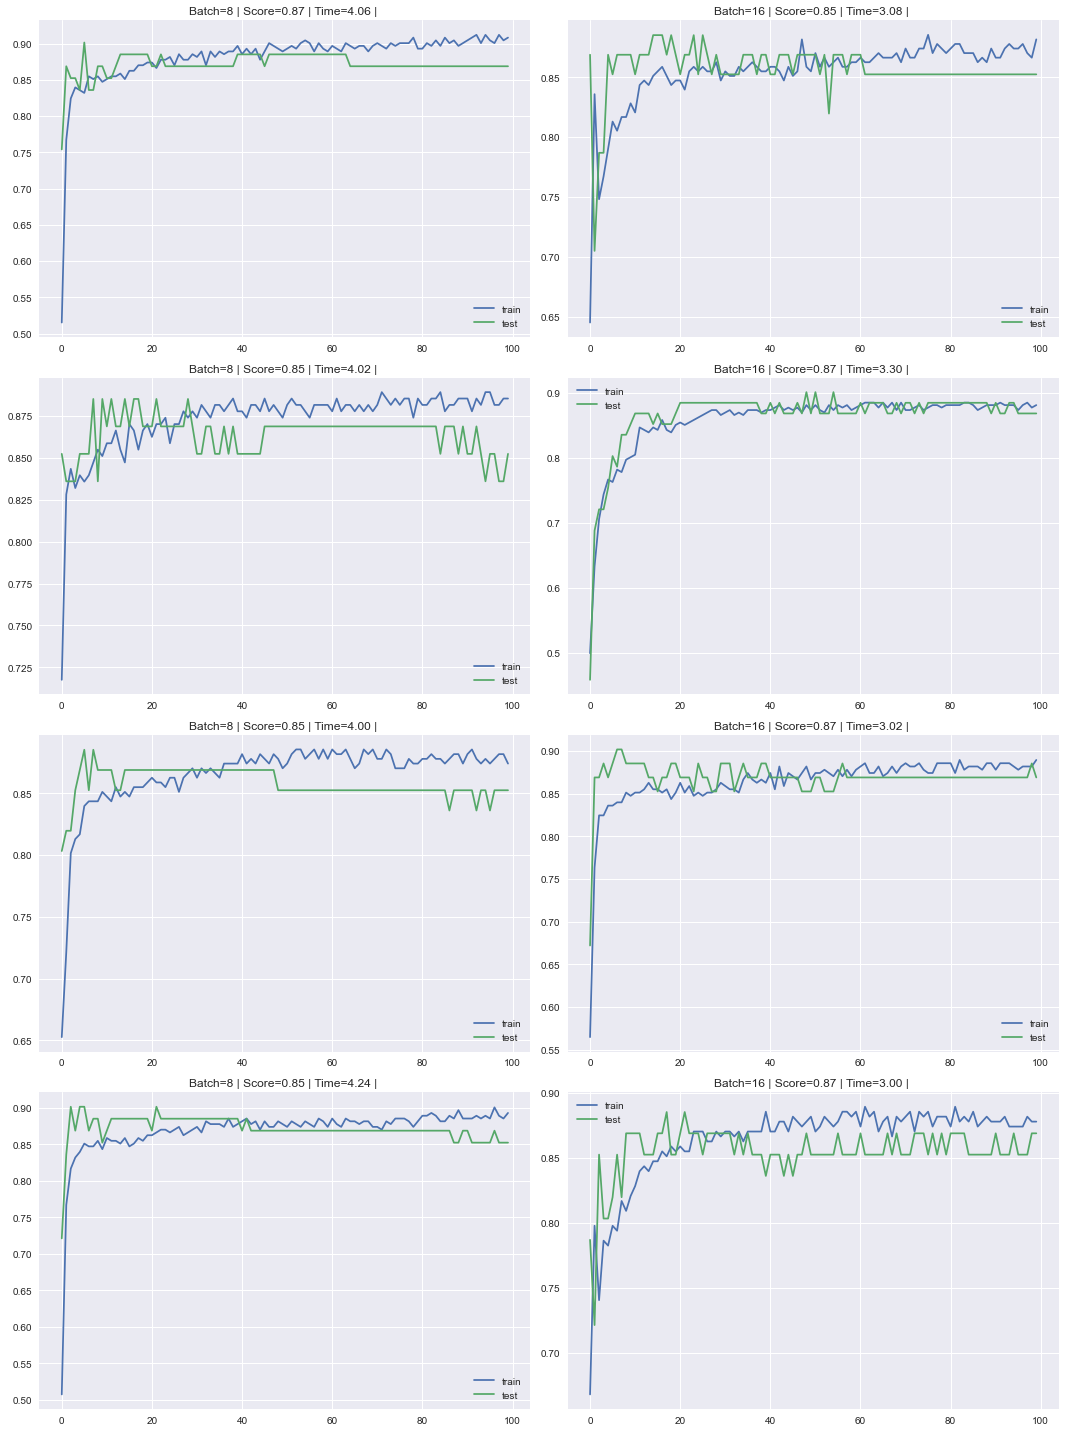

In [100]:
test_size = [0.1, 0.2, 0.3, 0.4]
optimizer = ['adam', 'rmsprop']
# batch_size=64

plt.figure(figsize=(15, 20))

k=0
for i in range(len(test_size)):
 
    for j in range(len(optimizer)):
                   
        k+=1
    
#     plotting
        plt.subplot(4, 2, k)
        plt.tight_layout()
    
#     train model
        print(f'Test_Size: ', test_size[i])
        X_train, y_train, X_test, y_test = add_exp(test_size[i])
        fit_model(X_train, y_train, X_test, y_test, n_batch[j], epoch=100,
                 opt=optimizer[j])
        
#     show plot
plt.show()

Test_Size:  0.3
Test_Size:  0.3
Test_Size:  0.4
Test_Size:  0.4


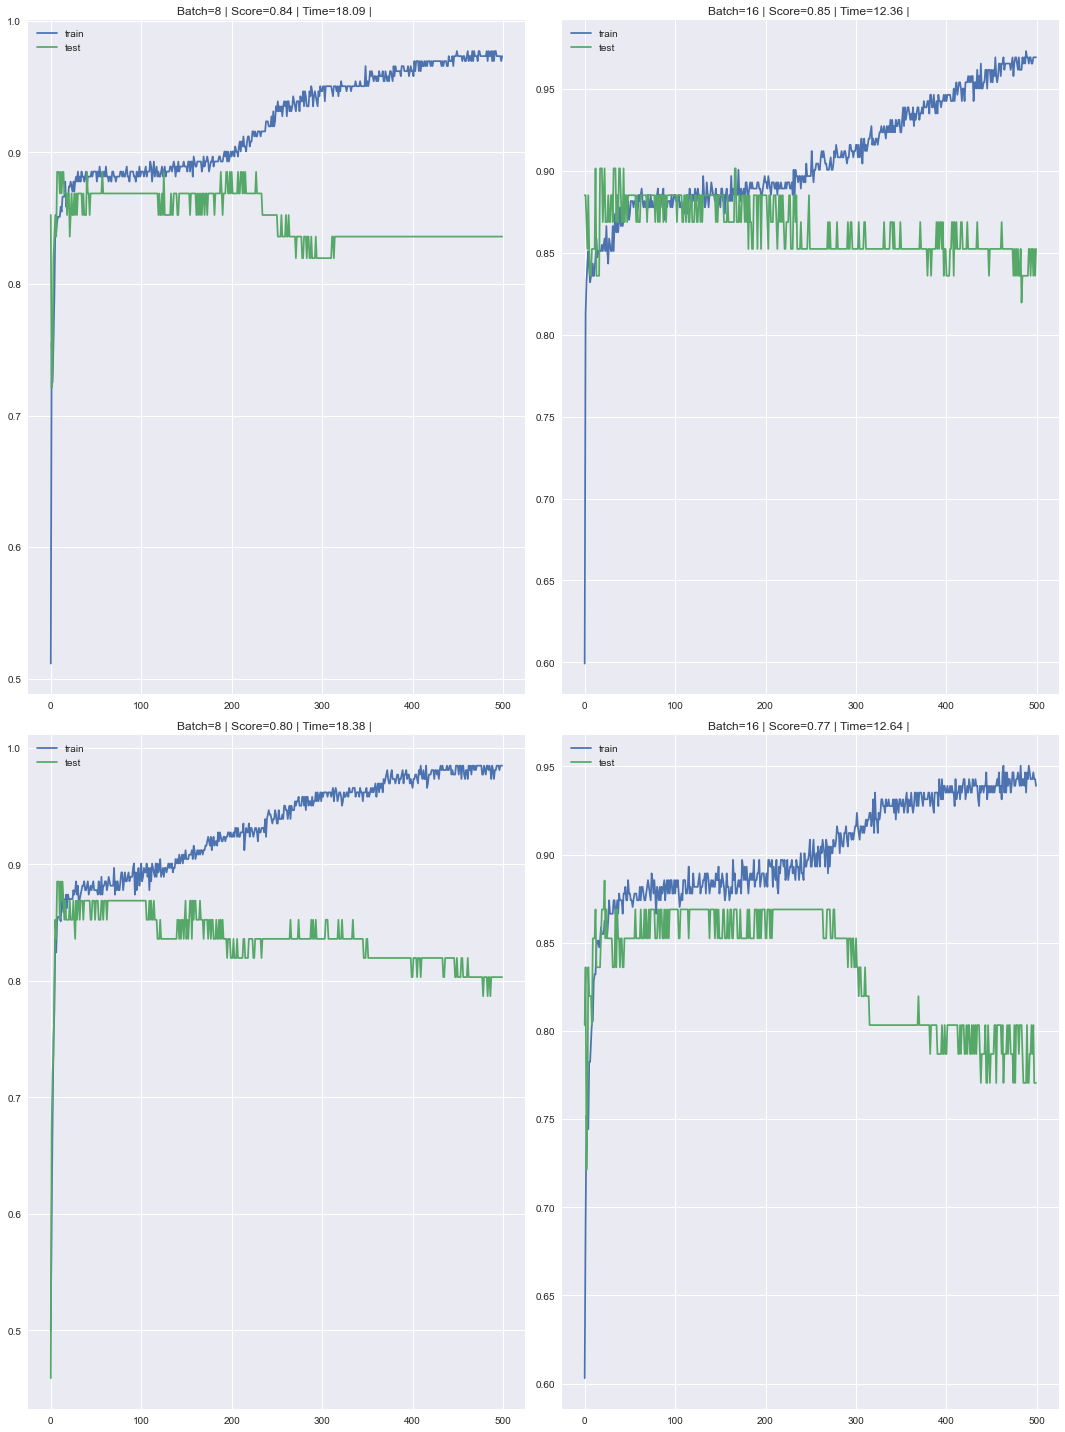

In [101]:
# Mencoba menambah epoch pada test_size 0.3 dan 0.4

test_size = [0.3, 0.4]
optimizer = ['adam', 'rmsprop']
# batch_size=64

plt.figure(figsize=(15, 20))

k=0
for i in range(len(test_size)):
 
    for j in range(len(optimizer)):
                   
        k+=1
    
#     plotting
        plt.subplot(2, 2, k)
        plt.tight_layout()
    
#     train model
        print(f'Test_Size: ', test_size[i])
        X_train, y_train, X_test, y_test = add_exp(test_size[i])
        fit_model(X_train, y_train, X_test, y_test, n_batch[j], epoch=500,
                 opt=optimizer[j])
        
#     show plot
plt.show()